# Bajando datos de diferentes fuentes. Ejemplos

## Bajar datos de Bicimad

In [1]:
# Importamos librerias
import requests
import zipfile
import pandas as pd

In [2]:
url = 'https://i.blogs.es/c72966/screenshot_1497/450_1000.jpeg'
image = requests.get(url)

In [3]:
with open('mutenroy.jpeg', 'wb') as f:
    f.write(image.content)

In [6]:
# https://opendata.emtmadrid.es/getattachment/037ee8a5-b824-43b1-ac7b-76225c783993/201810_Usage_Bicimad.aspx

filename = 'bicis.zip'
url = 'https://opendata.emtmadrid.es/getattachment/037ee8a5-b824-43b1-ac7b-76225c783993/201810_Usage_Bicimad.aspx'
r = requests.get(url)

KeyboardInterrupt: 

In [ ]:
# Guardamos el zip
with open(filename, 'wb') as f:
   f.write(r.content)

In [ ]:
# Extraemos lo que hay dentro
with zipfile.ZipFile(filename, 'r') as zip_ref:
    zip_ref.extractall(".")

In [ ]:
# Leemos los datos
datos_bicis = pd.read_json('201906_Usage_Bicimad.json', lines=True)

In [ ]:
# Vemos qué pinta tienen


# Acceso a archivos de la pagina de datos.gob.es
Uno de los mayores catálogos de información pública descargable en España

In [11]:
# https://datos.gob.es/es/catalogo/ea0003337-principales-indicadores-de-sostenibilidad1

url = 'https://data.renfe.com/dataset/928d911e-00ca-437b-be3f-068fc1f97800/resource/63d285e8-9f52-410b-8412-8a8c26f5ddb3/download/consumo-de-agua-y-materiales.csv'

datos = pd.read_csv(url, sep=';')
datos.head()

,Año,Consumo de agua (m3),Aceites/grasas (kg),Pinturas (kg)
0,2019,903240,540511,88537
1,2018,917605,446983,116778
2,2017,923881,452534,96362
3,2016,952455,302202,125304
4,2015,941651,315302,130003


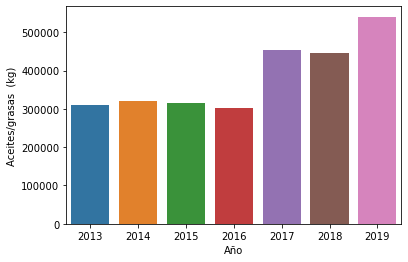

In [13]:
import seaborn as sns

sns.barplot(data = datos, x = 'Año', y = 'Aceites/grasas  (kg)');

## Bajando datos de la calidad del aire

También existe un dataset en Kaggle, pero vamos a ver un ejemplo

In [14]:
import pandas as pd
import requests
import io
import csv

url2 = "http://www.mambiente.munimadrid.es/opendata/horario.txt"

datos=pd.read_csv(url2, header=None)#.content


In [15]:
datos.head(10)

,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,51,52,53,54,55,56
0,28,79,4,1,38,2,2021,7,6,9.0,...,0,N,0,N,0,N,0,N,0,N
1,28,79,4,6,48,2,2021,7,6,0.1,...,0,N,0,N,0,N,0,N,0,N
2,28,79,4,7,8,2,2021,7,6,1.0,...,0,N,0,N,0,N,0,N,0,N
3,28,79,4,8,8,2,2021,7,6,11.0,...,0,N,0,N,0,N,0,N,0,N
4,28,79,4,12,8,2,2021,7,6,12.0,...,0,N,0,N,0,N,0,N,0,N
5,28,79,8,1,38,2,2021,7,6,4.0,...,0,N,0,N,0,N,0,N,0,N
6,28,79,8,6,48,2,2021,7,6,0.2,...,0,N,0,N,0,N,0,N,0,N
7,28,79,8,7,8,2,2021,7,6,2.0,...,0,N,0,N,0,N,0,N,0,N
8,28,79,8,8,8,2,2021,7,6,26.0,...,0,N,0,N,0,N,0,N,0,N
9,28,79,8,9,47,2,2021,7,6,9.0,...,0,N,0,N,0,N,0,N,0,N


# OpenStreetMap

In [16]:
# Amenities
# https://wiki.openstreetmap.org/wiki/Key:amenity

import requests
import json
import pandas as pd
overpass_url = "http://overpass-api.de/api/interpreter"
overpass_query = """
[out:json];
node["amenity"="restaurant"]
  (40.420801, -3.694702,40.423754, -3.688167); 
out;
"""
response = requests.get(overpass_url, 
                        params={'data': overpass_query})
print(response)
data = response.json()

<Response [200]>


In [18]:
data

{'version': 0.6,
 'generator': 'Overpass API 0.7.56.9 76e5016d',
 'osm3s': {'timestamp_osm_base': '2021-07-06T08:22:27Z',
  'copyright': 'The data included in this document is from www.openstreetmap.org. The data is made available under ODbL.'},
 'elements': [{'type': 'node',
   'id': 305536401,
   'lat': 40.4230858,
   'lon': -3.6935468,
   'tags': {'amenity': 'restaurant', 'name': 'La Castafiore'}},
  {'type': 'node',
   'id': 324580483,
   'lat': 40.4226068,
   'lon': -3.6932565,
   'tags': {'amenity': 'restaurant',
    'cuisine': 'japanese',
    'name': 'Sake Dining Himawari'}},
  {'type': 'node',
   'id': 3361315181,
   'lat': 40.4233148,
   'lon': -3.6925055,
   'tags': {'addr:city': 'Madrid',
    'addr:housenumber': '12',
    'addr:postcode': '28004',
    'addr:street': 'Calle de Doña Bárbara de Braganza',
    'addr:subdistrict': 'Justicia',
    'amenity': 'restaurant',
    'cuisine': 'regional',
    'name': 'Ainhoa',
    'phone': '+34 913 08 27 26',
    'website': 'http://resta

In [19]:
elements = data['elements']
places = {'lat': [], 'lon': [], 'name': [], 'address': []}

for i in elements:
    try:
        latitude = i['lat']
        longitude = i['lon']
        name = i['tags']['name']
        street = i['tags']['addr:street']
        number = i['tags']['addr:housenumber']
        
        places['lat'].append(latitude)
        places['lon'].append(longitude)
        places['name'].append(name)
        places['address'].append(street + ' ' + str(number))
        
    except:
        continue
        
print(places)

{'lat': [40.4233148, 40.4219559, 40.4219515, 40.422266, 40.4233452, 40.4224409, 40.4236005, 40.4221408, 40.4223791, 40.4227772, 40.4229908, 40.4222548, 40.422576, 40.4220813, 40.4218211, 40.4208179, 40.422426], 'lon': [-3.6925055, -3.6939049, -3.6935347, -3.694097, -3.6926318, -3.6942202, -3.6937246, -3.6908645, -3.6895175, -3.6897814, -3.6936524, -3.6942512, -3.694493, -3.6907483, -3.6898244, -3.6888032, -3.6934185], 'name': ['Ainhoa', 'En La Gloria', 'Tampu', 'Casa Gades', 'El Gato Persa', 'Cannibal Raw Bar', 'Luke', 'Taberna Pedraza', 'Flavia', 'SQD Meat Point', 'Noteolvides', 'Merci', 'Mortadella', 'New York Burger', 'Mestizo', 'Sushi Shop', 'Delirant'], 'address': ['Calle de Doña Bárbara de Braganza 12', 'Calle de Prim 9', 'Calle de Prim 13', 'Calle del Conde de Xiquena 4', 'Calle de Doña Bárbara de Braganza 10', 'Calle del Almirante 12', 'Calle de Doña Bárbara de Braganza 2', 'Calle de Recoletos 4', 'Calle de Gil de Santivañes 2', 'Calle de Villanueva 2', 'Calle del Marqués de Mo

## Web scrapping de IMDB

In [20]:
from bs4 import BeautifulSoup
import requests
import re
import pandas as pd

# Download IMDB's Top 250 data
url = 'http://www.imdb.com/chart/top'
response = requests.get(url)
soup = BeautifulSoup(response.text, 'lxml')

movies = soup.select('td.titleColumn')
links = [a.attrs.get('href') for a in soup.select('td.titleColumn a')]
crew = [a.attrs.get('title') for a in soup.select('td.titleColumn a')]
ratings = [b.attrs.get('data-value') for b in soup.select('td.posterColumn span[name=ir]')]
votes = [b.attrs.get('data-value') for b in soup.select('td.ratingColumn strong')]

imdb = []

# Store each item into dictionary (data), then put those into a list (imdb)
for index in range(0, len(movies)):
    # Seperate movie into: 'place', 'title', 'year'
    movie_string = movies[index].get_text()
    movie = (' '.join(movie_string.split()).replace('.', ''))
    movie_title = movie[len(str(index))+1:-7]
    year = re.search('\((.*?)\)', movie_string).group(1)
    place = movie[:len(str(index))-(len(movie))]
    data = {"movie_title": movie_title,
            "year": year,
            "place": place,
            "star_cast": crew[index],
            "rating": ratings[index],
            "vote": votes[index],
            "link": links[index]}
    imdb.append(data)
df = pd.DataFrame(imdb)
df


#for item in imdb:
#    print(item['place'], '-', item['movie_title'], '('+item['year']+') -', 'Starring:', item['star_cast'])

,movie_title,year,place,star_cast,rating,vote,link
0,Cadena perpetua,1994,1,"Frank Darabont (dir.), Tim Robbins, Morgan Fre...",9.220086937930727,None,/title/tt0111161/
1,El padrino,1972,2,"Francis Ford Coppola (dir.), Marlon Brando, Al...",9.147355884254592,None,/title/tt0068646/
2,El padrino: Parte II,1974,3,"Francis Ford Coppola (dir.), Al Pacino, Robert...",8.980081220514458,None,/title/tt0071562/
3,El caballero oscuro,2008,4,"Christopher Nolan (dir.), Christian Bale, Heat...",8.970803734877,None,/title/tt0468569/
4,12 hombres sin piedad,1957,5,"Sidney Lumet (dir.), Henry Fonda, Lee J. Cobb",8.936241387241546,None,/title/tt0050083/
...,...,...,...,...,...,...,...
245,Fanny y Alexander,1982,246,"Ingmar Bergman (dir.), Bertil Guve, Pernilla A...",8.021987108222715,None,/title/tt0083922/
246,Neon Genesis Evangelion: The End of Evangelion,1997,247,"Hideaki Anno (dir.), Megumi Ogata, Megumi Haya...",8.021553071161161,None,/title/tt0169858/
247,Drishyam,2013,248,"Jeethu Joseph (dir.), Mohanlal, Meena",8.021135627267235,None,/title/tt3417422/
248,Soul,2020,249,"Pete Docter (dir.), Jamie Foxx, Tina Fey",8.021023506607449,None,/title/tt2948372/


## Acediendo a datos de twitter
Para esta demo utilizaremos el paquete [tweepy](https://www.tweepy.org/) para atacar datos de Twitter desde Python.

Necesitamos registrarnos en la [web de desarrolladores](https://developer.twitter.com/en/apply-for-access) para obtener unas credenciales.

In [ ]:
import tweepy  
import time
import csv

import json

with open('./credentials.json') as f:
    credentials = json.load(f)
    
    
# Credenciales de la web de desarroladores
access_token = credentials['access_token']  
access_token_secret = credentials['access_token_secret']  
consumer_key = credentials['consumer_key']
consumer_secret = credentials['consumer_secret'] 

# Nos autenticamos en la API
try:
    auth = tweepy.OAuthHandler(consumer_key, consumer_secret)  
    auth.set_access_token(access_token, access_token_secret)  
    api = tweepy.API(auth,wait_on_rate_limit=True)
    print("Authentication OK")
except:
    print("Error during authentication")

In [ ]:
csvFile = open('tweet_covid19.csv', 'a')

#Use csv Writer
csvWriter = csv.writer(csvFile)

for tweet in tweepy.Cursor(api.search,q="#COVID19",count=50,
                           lang="es",
                           since="2020-09-05").items(50):
    
    print(tweet.created_at, tweet.text)
    csvWriter.writerow([tweet.created_at, tweet.text.encode('utf-8')])

## Datos del espacio

In [27]:
import requests


'''
https://thespacedevs.com/llapi
https://ll.thespacedevs.com/2.2.0/swagger
'''
space_url = "http://ll.thespacedevs.com/2.2.0"

path = '/astronaut/'

url_total = space_url + path
response = requests.get(url_total)
response.status_code #200
response.content #En bytes
response.json()

{'count': 657,
 'next': 'https://ll.thespacedevs.com/2.2.0/astronaut/?limit=10&offset=10',
 'previous': None,
 'results': [{'id': 276,
   'url': 'https://ll.thespacedevs.com/2.2.0/astronaut/276/',
   'name': 'Franz Viehböck',
   'status': {'id': 2, 'name': 'Retired'},
   'type': {'id': 2, 'name': 'Government'},
   'date_of_birth': '1960-08-24',
   'date_of_death': None,
   'nationality': 'Austrian',
   'bio': "Franz Artur Viehböck (born August 24, 1960 in Vienna) is an Austrian electrical engineer, and was Austria's first cosmonaut. He was titulated „Austronaut“ by his country's media. He visited the Mir space station in 1991 aboard Soyuz TM-13, returning aboard Soyuz TM-12 after spending just over a week in space.",
   'twitter': None,
   'instagram': None,
   'wiki': 'https://en.wikipedia.org/wiki/Franz_Viehb%C3%B6ck',
   'agency': {'id': 8,
    'url': 'https://ll.thespacedevs.com/2.2.0/agencies/8/',
    'name': 'Austrian Space Agency',
    'featured': False,
    'type': 'Government'

In [29]:
url_total = space_url + path + '/?nationality=Austrian'
response = requests.get(url_total)
response.status_code()

TypeError: 'int' object is not callable